In [283]:
!pip install xgboost --quiet


In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os,sys

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn
import datetime

from sklearn.metrics import roc_curve, auc,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [241]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [242]:
banks_df=pd.read_csv(r"D:\Projects\bank-additional-full.csv",delimiter=";")
data=pd.read_csv(r"D:\Projects\bank-additional-full.csv",delimiter=";")

In [243]:
banks_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [244]:
banks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Exploratory Data Analysis

In [245]:
#checking on the null values within dataset

data.isnull().sum()

# we can see that target variable needs to be well defined for further use

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [246]:
#feature engineering target variable 'y'
data['deposit']=data[['y']]
data['deposit'] = data['deposit'].replace({"yes": 1, "no": 0})
data.drop('y',axis=1,inplace=True)
data = data.rename(columns={'emp.var.rate': 'employment variation rate', 
                        'cons.price.idx': 'consumer price index', 
                        'cons.conf.idx': 'consumer confidence index',
                        'euribor3m': 'euribor',
                        'nr.employed': 'number of employees'})

#resetting the index
data.reset_index(drop=True,inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment variation rate,consumer price index,consumer confidence index,euribor,number of employees,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


<Axes: xlabel='deposit', ylabel='count'>

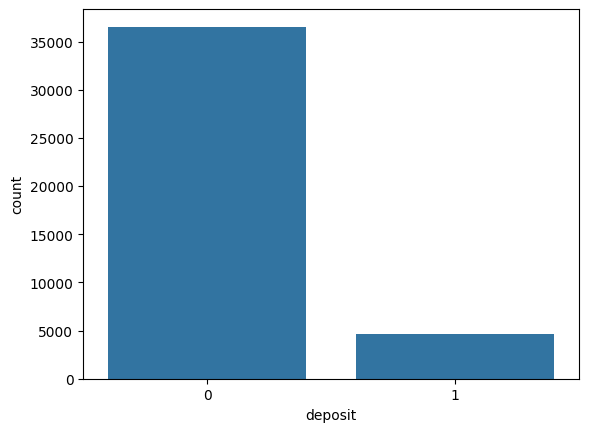

In [247]:
#looking at data distribution w.r.t deposit

sns.countplot(x='deposit', data=data)

# Add count annotations to the bars


In [248]:
counts = data['deposit'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')


ValueError: Image size of 565x13508198 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [249]:

plt.show()

#there is data imbalance present

In [250]:
#lets now look at features of people who enrolled for the term deposit and derive insights

deposited=data[data['deposit']==1]
#no_deposit=data[data['deposit']==0]

In [251]:
deposited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 75 to 41186
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4640 non-null   int64  
 1   job                        4640 non-null   object 
 2   marital                    4640 non-null   object 
 3   education                  4640 non-null   object 
 4   default                    4640 non-null   object 
 5   housing                    4640 non-null   object 
 6   loan                       4640 non-null   object 
 7   contact                    4640 non-null   object 
 8   month                      4640 non-null   object 
 9   day_of_week                4640 non-null   object 
 10  duration                   4640 non-null   int64  
 11  campaign                   4640 non-null   int64  
 12  pdays                      4640 non-null   int64  
 13  previous                   4640 non-null   int

In [252]:
deposited['job'].value_counts()

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

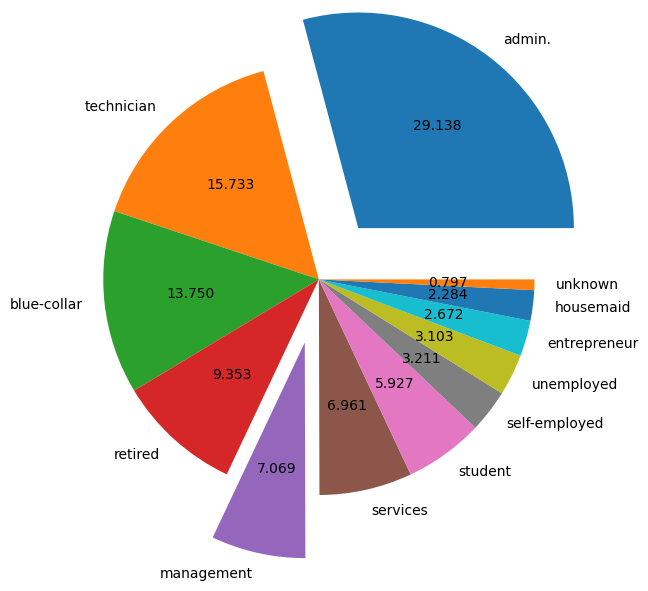

In [253]:
# potential job categories to exploit

plt.figure(figsize=(7,7))

plt.pie(deposited["job"].value_counts(), labels=deposited["job"].value_counts().index,autopct='%.3f',
       explode=(0.3,0,0,0,0.3,0,0,0,0,0,0,0))
plt.show()

#we can admin.,technician,blue-collar,retired jobs are the major shares of depositors

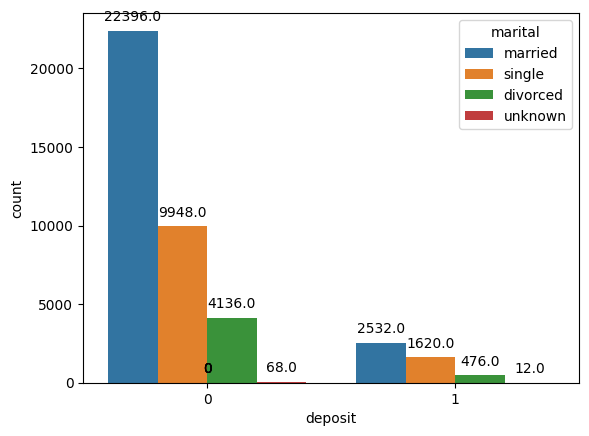

In [254]:
#comparing on other catgeories such as education marital,loan,housingdefault etc 

#marital

ax = sns.countplot(x='deposit', hue='marital', data=data)

# Add count annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()

In [255]:
#data preprocessing 

In [256]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
import numpy as np

In [257]:
data.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'employment variation rate',
 'consumer price index',
 'consumer confidence index',
 'euribor',
 'number of employees',
 'deposit']

Standardisation

In [263]:
x=data.drop(['job','education','month','contact','poutcome','day_of_week','marital', 'housing', 'deposit', 'loan', 'default'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std=scaler.fit_transform(x)
data_std=pd.DataFrame(data_std,columns=x.columns[:])
data.drop(columns=x.columns[:],inplace=True)
data = pd.concat([data, data_std], axis=1)

In [264]:
data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit,age,duration,campaign,pdays,previous,employment variation rate,consumer price index,consumer confidence index,euribor,number of employees
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


One hot encoding of categorical features

In [265]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['job','education','month','contact','poutcome','day_of_week']
#fit encoder
encoder = OneHotEncoder(sparse=False)
#transform
encoder.fit(data[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols))
data[encoded_features] = encoder.transform(data[categorical_cols])

# drop original features
data.drop(categorical_cols,axis=1,inplace=True)

c:\Users\HP\anaconda3\envs\pythonProject\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Label encoding of boolean categorical columns

In [266]:
from sklearn.preprocessing import LabelEncoder

categorical_bool_cols = ['marital', 'housing', 'deposit', 'loan', 'default']

encoder = LabelEncoder()
encoded_features = []

for col in categorical_bool_cols:
    encoder.fit(data[col])
    encoded_feature = encoder.transform(data[col])
    data[col] = encoded_feature
    #encoded_features.append(col + '_encoded')

In [267]:
data.head()

,marital,default,housing,loan,deposit,age,duration,campaign,pdays,previous,employment variation rate,consumer price index,consumer confidence index,euribor,number of employees,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,0,0,0,0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,0,0,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0,2,0,0,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,0,0,0,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,2,0,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [268]:
x= data.drop('deposit',axis=1)
y= data[['deposit']]

In [272]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [274]:
y_train['deposit'].value_counts()

0    23397
1     2963
Name: deposit, dtype: int64

In [275]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()

x_ros,y_ros=ros.fit_resample(x_train,y_train)

from collections import Counter
print(Counter(y))
print("##############"*5)
print(Counter(y_ros))

Counter({'deposit': 1})
######################################################################
Counter({'deposit': 1})


In [279]:
model= LogisticRegression()
model.fit(x_ros,y_ros)

predictions=model.predict(x_ros)
print("accuracy of LogisticRegression for train:",accuracy_score(y_ros,predictions),'\n')

print("\n----------------VALIDATION RESULTS---------------------")

predictions=model.predict(x_val)
print("accuracy of LogisticRegression for validation:",accuracy_score(y_val,predictions))
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)
print("Precision for validation set:", precision)
print("Recall for validation set:", recall)

print("\n----------------TEST RESULTS---------------------")

predictions=model.predict(x_test)
print("accuracy of LogisticRegression for test:",accuracy_score(y_test,predictions),)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Precision for test set:", precision)
print("Recall for test set:", recall)

print('\n',classification_report(y_test,predictions))


accuracy of LogisticRegression for train: 0.8697482583237167 


----------------VALIDATION RESULTS---------------------
accuracy of LogisticRegression for validation: 0.8584218512898331
Precision for validation set: 0.4361204013377926
Recall for validation set: 0.8787061994609164

----------------TEST RESULTS---------------------
accuracy of LogisticRegression for test: 0.8593105122602573
Precision for test set: 0.44061505832449627
Recall for test set: 0.8887700534759359

               precision    recall  f1-score   support

           0       0.98      0.86      0.92      7303
           1       0.44      0.89      0.59       935

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.86      0.88      8238



In [280]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=1)
model.fit(x_ros,y_ros)


predictions=model.predict(x_ros)
print("accuracy of AdaBoostClassifier for train:",accuracy_score(y_ros,predictions),'\n')

print("\n----------------VALIDATION RESULTS---------------------")

predictions=model.predict(x_val)
print("accuracy of AdaBoostClassifier for validation:",accuracy_score(y_val,predictions))
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)
print("Precision for validation set:", precision)
print("Recall for validation set:", recall)

print("\n----------------TEST RESULTS---------------------")

predictions=model.predict(x_test)
print("accuracy of AdaBoostClassifier for test:",accuracy_score(y_test,predictions),)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Precision for test set:", precision)
print("Recall for test set:", recall)

print('\n',classification_report(y_test,predictions))


accuracy of AdaBoostClassifier for train: 0.8757105611830577 


----------------VALIDATION RESULTS---------------------
accuracy of AdaBoostClassifier for validation: 0.8688922610015174
Precision for validation set: 0.4566145092460882
Recall for validation set: 0.8652291105121294

----------------TEST RESULTS---------------------
accuracy of AdaBoostClassifier for test: 0.8685360524399126
Precision for test set: 0.45828635851183763
Recall for test set: 0.8695187165775401

               precision    recall  f1-score   support

           0       0.98      0.87      0.92      7303
           1       0.46      0.87      0.60       935

    accuracy                           0.87      8238
   macro avg       0.72      0.87      0.76      8238
weighted avg       0.92      0.87      0.88      8238



In [281]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=1, n_estimators=50)
model.fit(x_ros,y_ros)

predictions=model.predict(x_ros)
print("accuracy of GradientBoostingClassifier for train:",accuracy_score(y_ros,predictions),'\n')
precision = precision_score(y_ros, predictions)
recall = recall_score(y_ros, predictions)
print("Precision for train set:", precision)
print("Recall for train set:", recall)

print("\n----------------VALIDATION RESULTS---------------------")

predictions=model.predict(x_val)
print("accuracy of GradientBoostingClassifier for validation:",accuracy_score(y_val,predictions))
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)
print("Precision for validation set:", precision)
print("Recall for validation set:", recall)

print("\n----------------TEST RESULTS---------------------")

predictions=model.predict(x_test)
print("accuracy of GradientBoostingClassifier for test:",accuracy_score(y_test,predictions),)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Precision for test set:", precision)
print("Recall for test set:", recall)

print('\n',classification_report(y_test,predictions))


accuracy of GradientBoostingClassifier for train: 0.8869513185451127 

Precision for train set: 0.8533900620633124
Recall for train set: 0.9344360388083942

----------------VALIDATION RESULTS---------------------
accuracy of GradientBoostingClassifier for validation: 0.8474962063732928
Precision for validation set: 0.41907692307692307
Recall for validation set: 0.9177897574123989

----------------TEST RESULTS---------------------
accuracy of GradientBoostingClassifier for test: 0.8443797038116048
Precision for test set: 0.4172627563185503
Recall for test set: 0.9358288770053476

               precision    recall  f1-score   support

           0       0.99      0.83      0.90      7303
           1       0.42      0.94      0.58       935

    accuracy                           0.84      8238
   macro avg       0.70      0.88      0.74      8238
weighted avg       0.93      0.84      0.87      8238



In [289]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_ros,y_ros)

predictions=model.predict(x_ros)
print("accuracy of XGBClassifier for train:",accuracy_score(y_ros,predictions),'\n')

print("\n----------------VALIDATION RESULTS---------------------")

predictions=model.predict(x_val)
print("accuracy of XGBClassifier for validation:",accuracy_score(y_val,predictions))
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)
print("Precision for validation set:", precision)
print("Recall for validation set:", recall)

print("\n----------------TEST RESULTS---------------------")

predictions_test=model.predict(x_test)
print("accuracy of XGBClassifier for test:",accuracy_score(y_test,predictions_test))
precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)
print("Precision for test set:", precision)
print("Recall for test set:", recall)

def create_conf_mat(y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosst = test_crosstb_comp.values
        return test_crosst
    
conf_mat = create_conf_mat(y_test, predictions_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()



accuracy of XGBClassifier for train: 0.9584989528572039 


----------------VALIDATION RESULTS---------------------
accuracy of XGBClassifier for validation: 0.8866464339908953
Precision for validation set: 0.4979457682826623
Recall for validation set: 0.816711590296496

----------------TEST RESULTS---------------------
accuracy of XGBClassifier for test: 0.8860160233066279
Precision for test set: 0.4987146529562982
Recall for test set: 0.8299465240641711


In [290]:
conf_mat = create_conf_mat(y_test, predictions_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

Arrays entered are not 1-D.
Please enter the correctly sized sets.


ValueError: Must pass 2-d input. shape=()